# Portfolio Analysis

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

import warnings
warnings.filterwarnings("ignore")

# fix_yahoo_finance is used to fetch data 
import yfinance as yf
yf.pdr_override()

In [26]:
# input
symbols = ['WMT','IIPR','SPXL','TSLA']
start = '2012-01-01'
end = '2020-03-18'

# Read data 
dataset = yf.download(symbols,start,end)['Adj Close']

# View Columns
dataset.head()

[*********************100%***********************]  4 of 4 completed


,IIPR,SPXL,TSLA,WMT
Date,,,,
2012-01-03,NaN,5.000786,28.080000,49.254120
2012-01-04,NaN,5.010229,27.709999,48.747944
2012-01-05,NaN,5.068470,27.120001,48.511192
2012-01-06,NaN,5.033841,26.910000,48.168285
2012-01-09,NaN,5.061387,27.250000,48.315235


In [27]:
# Calculate Daily Returns
returns = dataset.pct_change()

In [28]:
returns = returns.dropna()

In [29]:
returns.head()

,IIPR,SPXL,TSLA,WMT
Date,,,,
2016-12-02,-0.036553,0.001093,-0.002254,0.002972
2016-12-05,0.000000,0.017276,0.029371,-0.013262
2016-12-06,-0.097561,0.010150,-0.005086,0.006005
2016-12-07,0.014414,0.039130,0.039279,0.010593
2016-12-08,0.018354,0.007996,-0.004453,-0.003683


In [30]:
# Calculate mean returns
meanDailyReturns = returns.mean()
print(meanDailyReturns)

IIPR    0.002047
SPXL    0.000722
TSLA    0.001626
WMT     0.000824
dtype: float64


In [31]:
# Calculate std returns
stdDailyReturns = returns.std()
print(stdDailyReturns)

IIPR    0.033679
SPXL    0.033748
TSLA    0.034172
WMT     0.014054
dtype: float64


In [32]:
# Define weights for the portfolio
weights = np.array([0.5, 0.2, 0.2, 0.1])

In [33]:
# Calculate the covariance matrix on daily returns
cov_matrix = (returns.cov())*250
print (cov_matrix)

          IIPR      SPXL      TSLA       WMT
IIPR  0.283570  0.094077  0.055960  0.021649
SPXL  0.094077  0.284730  0.116854  0.066748
TSLA  0.055960  0.116854  0.291932  0.021428
WMT   0.021649  0.066748  0.021428  0.049378


In [34]:
# Calculate expected portfolio performance
portReturn = np.sum(meanDailyReturns*weights)

In [35]:
# Print the portfolio return
print(portReturn)

0.0015756104878705587


In [36]:
# Create portfolio returns column
returns['Portfolio'] = returns.dot(weights)

In [37]:
returns.head()

,IIPR,SPXL,TSLA,WMT,Portfolio
Date,,,,,
2016-12-02,-0.036553,0.001093,-0.002254,0.002972,-0.018212
2016-12-05,0.000000,0.017276,0.029371,-0.013262,0.008003
2016-12-06,-0.097561,0.010150,-0.005086,0.006005,-0.047167
2016-12-07,0.014414,0.039130,0.039279,0.010593,0.023948
2016-12-08,0.018354,0.007996,-0.004453,-0.003683,0.009518


In [38]:
# Calculate cumulative returns
daily_cum_ret=(1+returns).cumprod()
print(daily_cum_ret.tail())

                IIPR      SPXL      TSLA       WMT  Portfolio
Date                                                         
2020-03-11  4.394462  1.582410  3.487079  1.747357   3.781166
2020-03-12  3.750939  1.128609  3.081977  1.588853   3.165286
2020-03-13  4.084406  1.432967  3.005388  1.742318   3.491548
2020-03-16  3.248453  0.947594  2.447053  1.630235   2.745519
2020-03-17  3.368935  1.102509  2.365296  1.821112   2.900003


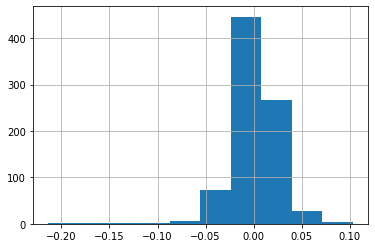

In [39]:
returns['Portfolio'].hist()
plt.show()

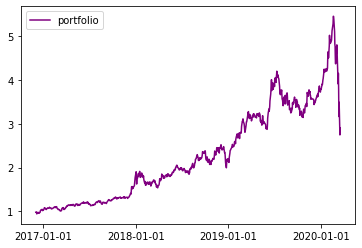

In [40]:
import matplotlib.dates

# Plot the portfolio cumulative returns only
fig, ax = plt.subplots()
ax.plot(daily_cum_ret.index, daily_cum_ret.Portfolio, color='purple', label="portfolio")
ax.xaxis.set_major_locator(matplotlib.dates.YearLocator())
plt.legend()
plt.show()

In [41]:
# Print the mean
print("mean : ", returns['Portfolio'].mean()*100)

# Print the standard deviation
print("Std. dev: ", returns['Portfolio'].std()*100)

# Print the skewness
print("skew: ", returns['Portfolio'].skew())

# Print the kurtosis
print("kurt: ", returns['Portfolio'].kurtosis())

mean :  0.1575610487870556
Std. dev:  2.3622054442349256
skew:  -1.4188385687958558
kurt:  12.976745456386688


In [42]:
# Calculate the standard deviation by taking the square root
port_standard_dev = np.sqrt(np.dot(weights.T, np.dot(weights, cov_matrix)))

# Print the results 
print(str(np.round(port_standard_dev, 4) * 100) + '%')

37.35%


In [43]:
# Calculate the portfolio variance
port_variance = np.dot(weights.T, np.dot(cov_matrix, weights))

# Print the result
print(str(np.round(port_variance, 4) * 100) + '%')

13.950000000000001%


In [49]:
# Calculate total return and annualized return from price data 
total_return = (returns['Portfolio'][-1] - returns['Portfolio'][0]) / returns['Portfolio'][0]

# Annualize the total return over 6 year 
annualized_return = ((total_return + 1)**(1/6))-1

-4.0896251203293525 nan


In [50]:
# Calculate annualized volatility from the standard deviation
vol_port = returns['Portfolio'].std() * np.sqrt(250)


0.3734974752516114


In [46]:
# Calculate the Sharpe ratio 
rf = 0.01
sharpe_ratio = ((annualized_return - rf) / vol_port)
print (sharpe_ratio)

nan


If the analysis results in a negative Sharpe ratio, it either means the risk-free rate is greater than the portfolio's return, or the portfolio's return is expected to be negative. 

In [47]:
# Create a downside return column with the negative returns only
target = 0
downside_returns = returns.loc[returns['Portfolio'] < target]

# Calculate expected return and std dev of downside
expected_return = returns['Portfolio'].mean()
down_stdev = downside_returns.std()

# Calculate the sortino ratio
rf = 0.01
sortino_ratio = (expected_return - rf)/down_stdev

# Print the results
print("Expected return: ", expected_return*100)
print('-' * 50)
print("Downside risk:")
print(down_stdev*100)
print('-' * 50)
print("Sortino ratio:")
print(sortino_ratio)

Expected return:  0.1575610487870556
--------------------------------------------------
Downside risk:
IIPR         2.870364
SPXL         3.774991
TSLA         3.135736
WMT          1.267210
Portfolio    2.023106
dtype: float64
--------------------------------------------------
Sortino ratio:
IIPR        -0.293496
SPXL        -0.223163
TSLA        -0.268658
WMT         -0.664798
Portfolio   -0.416409
dtype: float64


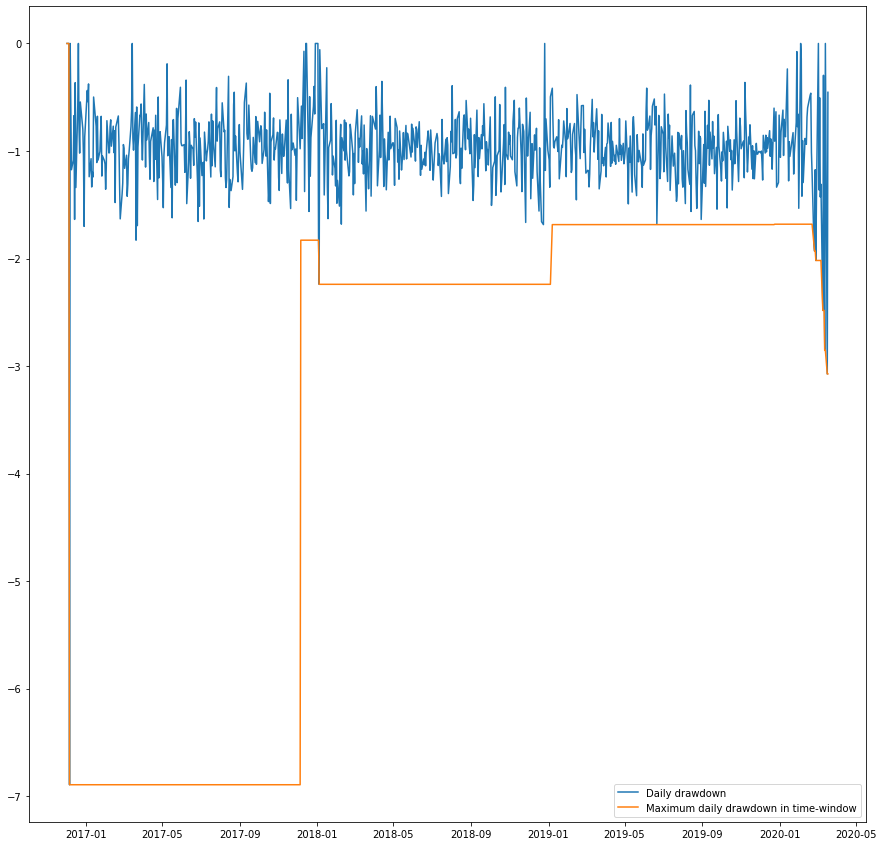

In [48]:
# Calculate the max value 
roll_max = returns['Portfolio'].rolling(center=False,min_periods=1,window=252).max()

# Calculate the daily draw-down relative to the max
daily_draw_down = returns['Portfolio']/roll_max - 1.0

# Calculate the minimum (negative) daily draw-down
max_daily_draw_down = daily_draw_down.rolling(center=False,min_periods=1,window=252).min()

# Plot the results
plt.figure(figsize=(15,15))
plt.plot(returns.index, daily_draw_down, label='Daily drawdown')
plt.plot(returns.index, max_daily_draw_down, label='Maximum daily drawdown in time-window')
plt.legend()
plt.show()